## On-Policy Monte Carlo Control

Dans ce notebook, nous allons implémenter l'une des deux stratégies majeures basées sur l'apprentissage d'une politique par interaction avec l'environnement, appelée *on-policy learning* (apprentissage sur politique).

L'agent va dérouler un épisode entier, du début à la fin, et sur la base de cette expérience, il va mettre à jour les q-values de chaque paire état-action $Q(s,a)$.

## Gérer les imports

In [8]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [9]:
env = BucketEnv3()

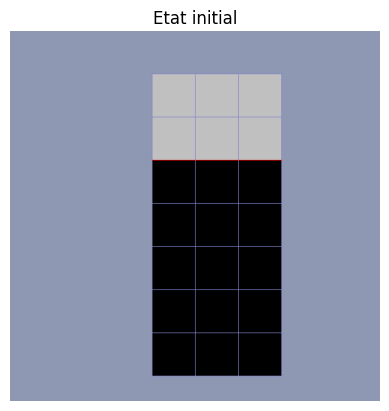

In [10]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title("Etat initial")
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

## Definition de la table de valeurs $Q(s, a)$

#### Création de la table $Q(s, a)$
Cette table doit permettre de lier chaque état à une action.
Pour cela, on utilise la librairie `numpy` pour créer un tableau avec une forme (*shape*) correspondant à cette paire.
La forme attendu est donnée par un tuple.

Exemple
```python
>>> s = (2,2)
>>> np.zeros(s)
array([[ 0.,  0.],
       [ 0.,  0.]])
```


In [11]:
action_values = np.zeros((7, 7, 7) + (5,))


## Définition d'une politique $\pi(s)$

#### Création de la politique $\pi(s)$
La politique indique l'action à prendre en fonction d'un état.

Cette politique étant $\epsilon-$greedy, elle est responsable de l'exploration de l'espace.
Elle devra donc parfois renvoyer une action aléatoire.
Pour cela, nous allons définir une fonction prenant en paramètre une état et un paramètre `epsilon` ayant comme valeur par défaut `0.2`, indiquant que 20% du temps, une action aléatoire sera prise.

La prise en compte d'epsilon se fera en la comparant avec une valeur prise aléatoirement, grâce à `np.random.random()`.
La décision aléatoire sera également prise aléatoirement parmi les 5 actions possibles, grâce à `np.random.choice(5)`.

Dans le cas où la décision est prise par rapport $Q(s,a)$, il faut choisir l'action qui maximise la probabilité de succès. Comme il peut y avoir plusieurs actions maximisant cette valeur, nous allons devoir casser les équivalences. Pour cela, nous allons utiliser `np.flatnonzero()` combiné à la condition de maximisation `a == a.max()`

In [12]:
def policy(state, epsilon=.2):
    if np.random.random() < epsilon:
        return np.random.choice(5)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Tester la politique avec l'état (0, 0, 0)

In [ ]:
policy((0, 0, 0))

## Implementation de l'algorithme

</br>

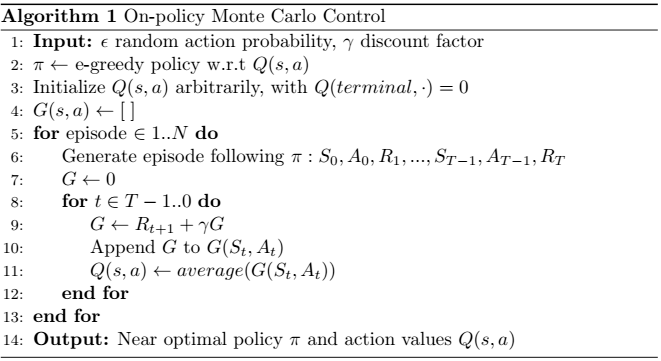
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



In [18]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=1/6):
    stats = {'Returns': []}
    sa_returns = {}
    for episode in tqdm(range(1, episodes+1)):
        state = env.reset()
        done = False
        transitions = []
        ep_return = 0
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action,reward])
            state = next_state
            ep_return += reward
        stats['Returns'].append(ep_return)
        G = 0
                   
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])
        
    return stats

IndentationError: unexpected indent (3285545609.py, line 17)

In [19]:
stats = on_policy_mc_control(policy, action_values, episodes=1000, epsilon=1/6)

 44%|██████████████████████████████████████████████████▌                                                               | 444/1000 [00:00<00:00, 2228.49it/s]

(4, 3, 5) 2
(2, 3, 5) 0
(2, 3, 3) 2
(2, 3, 1) 2
(2, 1, 1) 1
(2, 0, 0) 4
(0, 0, 0) 0
(5, 5, 5) 4
(4, 4, 5) 3
(2, 3, 5) 3
(0, 3, 5) 0
(0, 3, 3) 2
(0, 2, 0) 4
(0, 0, 0) 1
(5, 5, 5) 4
(3, 5, 5) 0
(3, 3, 5) 1
(3, 3, 3) 2
(1, 3, 3) 0
(1, 1, 2) 4
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 5) 1
(5, 5, 3) 2
(4, 4, 3) 3
(1, 3, 3) 3
(1, 1, 2) 4
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 5) 2
(3, 5, 5) 0
(3, 3, 5) 1
(3, 3, 3) 2
(3, 1, 2) 4
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 5) 3
(3, 5, 5) 0
(1, 5, 5) 0
(1, 1, 4) 4
(1, 1, 2) 2
(0, 0, 2) 3
(0, 0, 0) 2
(5, 3, 5) 2
(3, 3, 5) 0
(3, 3, 3) 2
(3, 1, 2) 4
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(3, 5, 5) 1
(3, 3, 5) 1
(3, 3, 3) 2
(1, 3, 3) 0
(1, 1, 2) 4
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 3
(5, 5, 2) 2
(5, 3, 2) 1
(3, 3, 2) 0
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 0
(5, 5, 2) 2
(5, 3, 2) 1
(3, 3, 2) 0
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 3
(5, 5, 2) 2
(5, 3, 2) 1
(3, 3, 2) 0
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 4
(5, 

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▎               | 862/1000 [00:00<00:00, 1911.09it/s]

(4, 5, 5) 3
(2, 5, 5) 0
(2, 4, 4) 4
(0, 4, 4) 0
(0, 3, 3) 4
(0, 0, 2) 4
(0, 0, 0) 2
(5, 5, 4) 3
(4, 4, 4) 3
(4, 2, 4) 1
(2, 2, 4) 0
(2, 2, 2) 2
(0, 2, 2) 0
(0, 1, 1) 4
(0, 0, 0) 4
(4, 4, 4) 1
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 0
(3, 5, 4) 0
(3, 5, 2) 2
(3, 3, 2) 1
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 1, 1) 0
(4, 0, 0) 4
(2, 0, 0) 0
(0, 0, 0) 0
(5, 5, 4) 1
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 4
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 5) 0
(3, 5, 5) 0
(1, 5, 5) 0
(1, 1, 4) 4
(1, 1, 2) 2
(0, 0, 2) 3
(0, 0, 0) 2
(4, 3, 3) 0
(4, 2, 2) 4
(4, 1, 1) 4
(4, 0, 0) 4
(2, 0, 0) 0
(0, 0, 0) 0
(5, 5, 5) 1
(5, 5, 3) 2
(3, 5, 3) 0
(3, 3, 3) 1
(3, 2, 2) 4
(1, 2, 2) 0
(1, 1, 0) 4
(0, 0, 0) 3
(1, 5, 3) 3
(1, 3, 3) 1
(1, 1, 2) 4
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 4
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(1, 3, 2) 0
(1, 1, 2) 1
(0, 0, 2) 3
(0, 


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1834.89it/s]

(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 1
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 1
(4, 4, 0) 4
(3, 1, 0) 3
(1, 1, 0) 0
(0, 0, 0) 3
(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 3
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(4, 5, 5) 1
(4, 4, 4) 4
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 0
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 0, 2) 3
(0, 0, 0) 2
(5, 5, 4) 4
(4, 4, 4) 3
(3, 3, 4) 3
(3, 3, 2) 2
(3, 1, 2) 1
(1, 1, 2) 0
(0, 

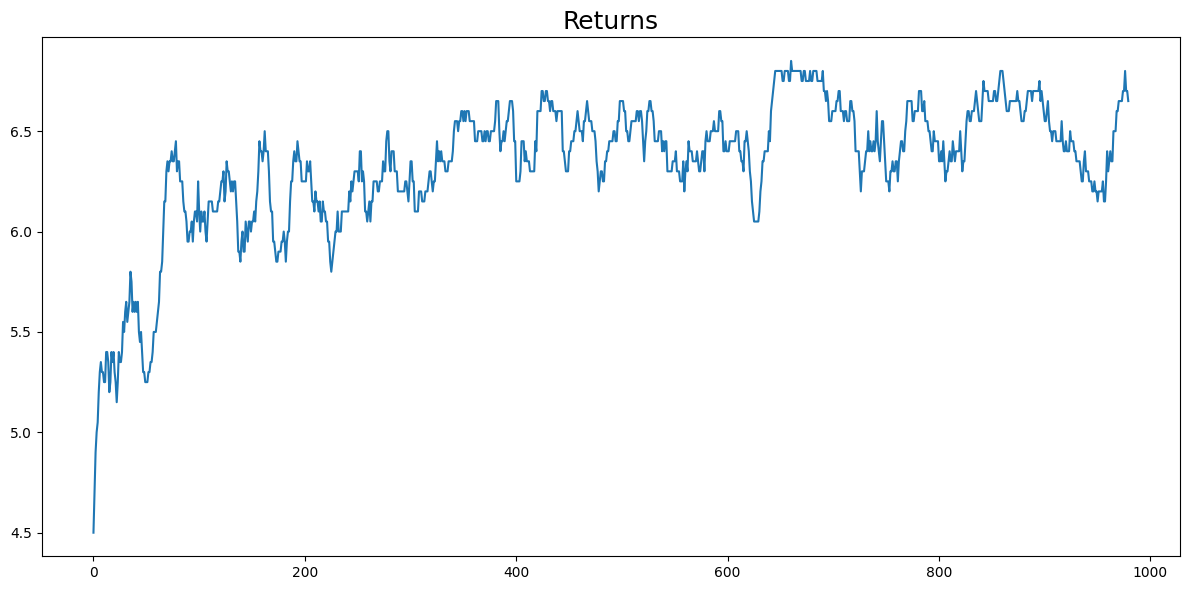

In [15]:
plot_stats(stats)

In [ ]:
testing(env, action_values)

In [ ]:
rendering(env, policy, episodes=3)